In [ ]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob

https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [ ]:
import kagglehub
path = kagglehub.dataset_download("tongpython/cat-and-dog")

In [ ]:
path

'/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1'

In [ ]:
from pathlib import Path
path = Path(path)

In [ ]:
list(path.glob("*"))

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set')]

In [ ]:
train = path / "training_set" / "training_set"

In [ ]:
list(train.glob("*"))

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats')]

In [ ]:
list((path / "test_set" / "test_set").glob("*"))

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set/dogs'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set/cats')]

In [ ]:
dogs = train / "dogs"
cats = train / "cats"

In [ ]:
print(list(dogs.glob("*"))[:5])
print()
print(list(cats.glob("*"))[:5])

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.2359.jpg'), PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.2419.jpg'), PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.1702.jpg'), PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.536.jpg'), PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.769.jpg')]

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.1577.jpg'), PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.1046.jpg'), PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.318.jpg'), PosixPat

In [ ]:
from PIL import Image

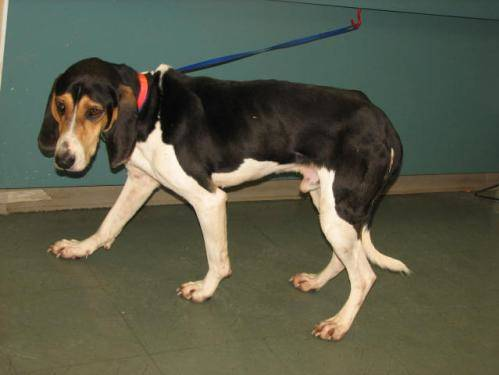

In [ ]:
Image.open(dogs / "dog.2394.jpg")

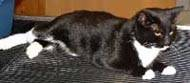

In [ ]:
Image.open(cats / "cat.3637.jpg")

In [ ]:
cat = list(cats.glob("*.jpg"))
dog = list(dogs.glob("*.jpg"))
cat_dog = cat + dog
len(cat_dog)

8005

In [ ]:
cat_dog[:10]

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.1577.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.1046.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.318.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.1733.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.3044.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.120.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.2290.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.738.jpg'),
 Po

In [ ]:
from random import shuffle, seed
seed(10)
shuffle(cat_dog)

In [ ]:
cat_dog[:10]

[PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.3742.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.2859.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.3760.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.461.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.3057.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.2222.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats/cat.1694.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs/dog.3867.jpg'),
 

In [ ]:
cat_dog[0].stem

'dog.3742'

In [ ]:
cat_dog[0].stem.startswith("dog")

True

In [ ]:
cat_dog[0].stem.startswith("cat")

False

In [ ]:
[int(f.stem.startswith("dog")) for f in cat_dog[:10]]

[1, 0, 0, 1, 1, 0, 0, 1, 0, 0]

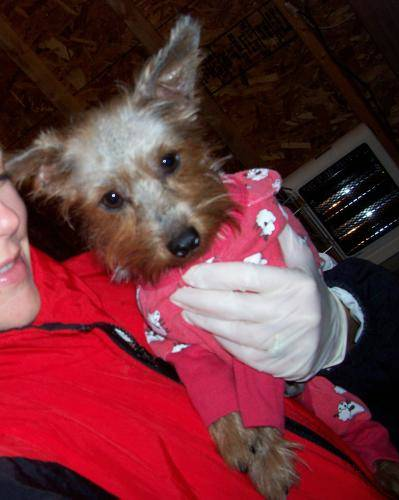

In [ ]:
Image.open(cat_dog[0])

In [ ]:
image = cv2.imread(cat_dog[0])
image.shape

(500, 399, 3)

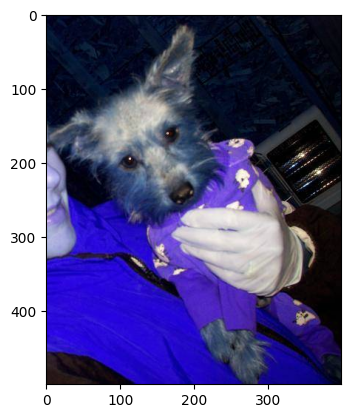

In [ ]:
plt.imshow(image);

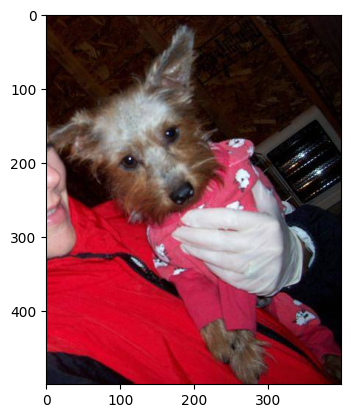

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [ ]:
from torch.utils.data import Dataset, DataLoader
from random import shuffle

class cats_dogs(Dataset):
  def __init__(self, folder, transform=None):
    cats = (folder / "cats").glob("*.jpg")
    dogs = (folder / "dogs").glob("*.jpg")
    self.fpaths = list(cats) + list(dogs)
    shuffle(self.fpaths)
    self.targets = [int(f.stem.startswith("dog")) for f in self.fpaths] # dog=1 & cat=0
    self.transform = transform

  def __len__(self):
    return len(self.fpaths)

  def __getitem__(self, ix):
    target = self.targets[ix]
    target = np.array(target).astype(np.float32)
    image = cv2.imread(self.fpaths[ix])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if self.transform:
      image = self.transform(image)
    return image, target

In [ ]:
from torchvision.transforms import v2

In [ ]:
transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((224, 224)),
    v2.ToDtype(torch.float32, scale=True),  # 0-255 to 0-1
])

In [ ]:
transform(image).shape

torch.Size([3, 224, 224])

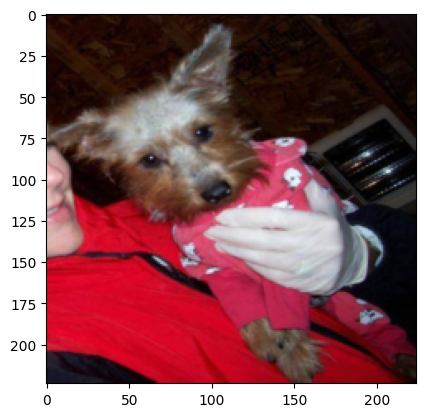

In [ ]:
plt.imshow(transform(image).permute(1, 2, 0));

In [ ]:
train_data_dir = path / "training_set" / "training_set"
test_data_dir = path / "test_set" / "test_set"

In [ ]:
data = cats_dogs(train_data_dir, transform=transform)
len(data)

8005

In [ ]:
sample = data[0]
img, target = sample
img.shape, target

(torch.Size([3, 224, 224]), array(0., dtype=float32))

In [ ]:
img.min(), img.max()

(tensor(0.), tensor(1.))

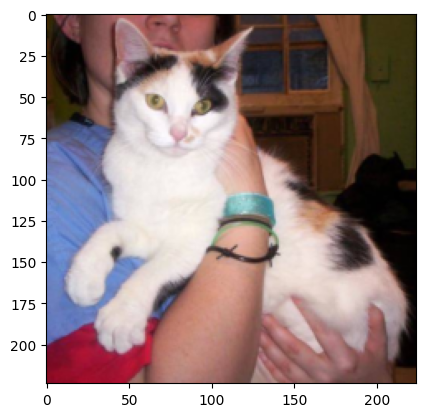

In [ ]:
plt.imshow(img.permute(1, 2, 0));

In [ ]:
def conv_layer(ni,no,kernel_size,stride=1):
    return nn.Sequential(
    nn.Conv2d(ni, no, kernel_size, stride),
    nn.ReLU(),
    nn.BatchNorm2d(no),
    nn.MaxPool2d(2)
    )

def get_model():
    model = nn.Sequential(
    conv_layer(3, 64, 3),
    conv_layer(64, 512, 3),
    conv_layer(512, 512, 3),
    conv_layer(512, 512, 3),
    conv_layer(512, 512, 3),
    conv_layer(512, 512, 3),
    nn.Flatten(),
    nn.Linear(512, 1),
    nn.Sigmoid(),
    ).to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model, loss_fn, optimizer

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
model, loss_fn, optimizer = get_model()
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1]                    --
├─Sequential: 1-1                        [1, 64, 111, 111]         --
│    └─Conv2d: 2-1                       [1, 64, 222, 222]         1,792
│    └─ReLU: 2-2                         [1, 64, 222, 222]         --
│    └─BatchNorm2d: 2-3                  [1, 64, 222, 222]         128
│    └─MaxPool2d: 2-4                    [1, 64, 111, 111]         --
├─Sequential: 1-2                        [1, 512, 54, 54]          --
│    └─Conv2d: 2-5                       [1, 512, 109, 109]        295,424
│    └─ReLU: 2-6                         [1, 512, 109, 109]        --
│    └─BatchNorm2d: 2-7                  [1, 512, 109, 109]        1,024
│    └─MaxPool2d: 2-8                    [1, 512, 54, 54]          --
├─Sequential: 1-3                        [1, 512, 26, 26]          --
│    └─Conv2d: 2-9                       [1, 512, 52, 52]          2,359,

In [ ]:
def train_batch(x, y, model, optimizer, loss_fn):
    prediction = model(x).squeeze()
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
    prediction = model(x).squeeze()
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()

In [ ]:
def get_data():
    train = cats_dogs(train_data_dir, transform=transform)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = cats_dogs(test_data_dir, transform=transform)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

In [ ]:
@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x).squeeze()
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [ ]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
from tqdm import tqdm

In [ ]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):

    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_losses, val_epoch_accuracies = [], []
    for ix, batch in tqdm(enumerate(iter(trn_dl)), total=len(trn_dl)):
        x, y = batch
        x, y = x.to(device), y.to(device)
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        x, y = x.to(device), y.to(device)
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        x, y = x.to(device), y.to(device)
        loss_val = val_loss(x, y, model)
        val_epoch_losses.append(loss_val)
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    validation_loss = np.array(val_epoch_losses).mean()
    val_epoch_accuracy = np.mean(val_epoch_accuracies)

    print(train_epoch_loss)
    print(train_epoch_accuracy)
    print(validation_loss)
    print(val_epoch_accuracy)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0


100%|██████████| 250/250 [02:07<00:00,  1.96it/s]


0.6746141351461411
0.691875
0.5993321268331437
0.6909722222222222
1


100%|██████████| 250/250 [02:05<00:00,  1.99it/s]


0.5102040933370591
0.787625
0.4715011924032181
0.7797619047619048
2


100%|██████████| 250/250 [02:04<00:00,  2.01it/s]


0.42850607603788377
0.83475
0.41134249028705416
0.8050595238095238
3


100%|██████████| 250/250 [02:04<00:00,  2.01it/s]


0.34007180741429327
0.877625
0.3325506905241618
0.8536706349206349
4


100%|██████████| 250/250 [02:04<00:00,  2.02it/s]


0.26182198092341424
0.926875
0.2545580473684129
0.8938492063492064


In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
import pickle

In [ ]:
results = dict(
    train_losses = train_losses,
    train_accuracies = train_accuracies,
    val_losses = val_losses,
    val_accuracies = val_accuracies
)

In [ ]:
with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

In [ ]:
with open("results.pkl", "rb") as f:
    results = pickle.load(f)

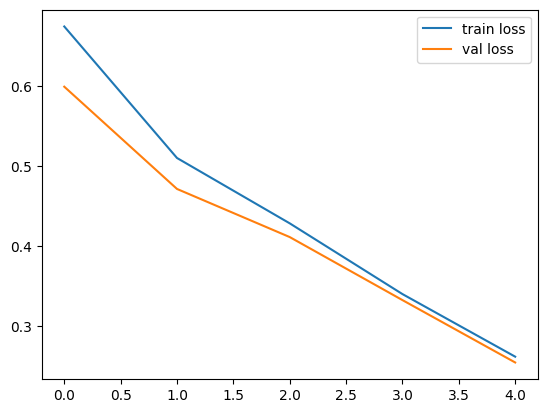

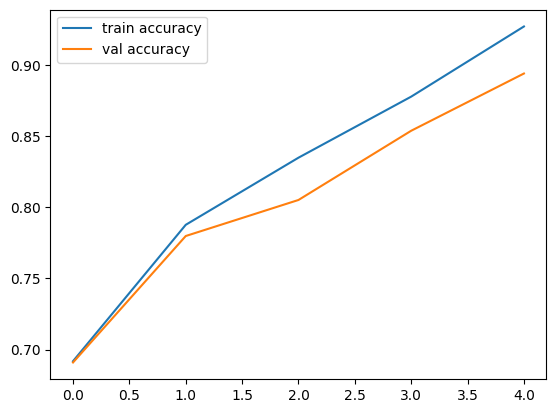

In [ ]:
plt.plot(results["train_losses"], label="train loss")
plt.plot(results["val_losses"], label="val loss")
plt.legend()
plt.show()

plt.plot(results["train_accuracies"], label="train accuracy")
plt.plot(results["val_accuracies"], label="val accuracy")
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load("model.pth", map_location=device, weights_only=True))

<All keys matched successfully>